In [28]:
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.special as sspecial
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Exercise 1

Read in the data

In [29]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/statisticallearning-2020/Sheet07/Solution'

ModuleNotFoundError: No module named 'google'

In [30]:
import pandas as pd
prac7Train = pd.read_csv('prac7csv/prac7Train.csv')
prac7Test = pd.read_csv('prac7csv/prac7Test.csv')

population = {'Caucasian': 1,'African American': 0} 
# traversing through dataframe 
# famhist column and writing 
# values where key matches
prac7Train.population = [population[item] for item in prac7Train.population] 
feature_names = np.array(list(prac7Train)[1:16])
prac7Train.head(8)


,Unnamed: 0,D8S1179,D21S11,D7S820,CSF1PO,D3S1358,TH01,D13S317,D16S539,D2S1338,D19S433,vWA,TPOX,D18S51,D5S818,FGA,population
0,OT07760,21,59.0,17.0,21,34.0,13.0,22,23,41,30.2,33,19,35.0,24,47.0,1
1,PT84187,29,55.0,20.0,18,33.0,15.3,23,26,38,27.0,36,21,35.0,26,47.0,0
2,UA16921,22,60.0,19.0,21,32.0,16.0,22,22,46,25.0,33,21,25.0,22,40.0,1
3,PT83880,26,61.2,17.0,20,31.0,16.0,21,22,44,27.0,35,19,28.0,22,47.0,0
4,Y6,29,63.2,20.0,24,33.0,15.3,26,24,43,28.0,34,16,28.0,25,43.0,1
5,Y5,31,58.0,21.0,23,32.0,15.3,24,24,42,28.0,36,18,27.0,21,45.0,1
6,GT37184,27,56.0,23.0,20,33.0,15.0,26,19,43,28.0,36,20,41.0,22,47.0,0
7,PT84181,27,66.0,21.0,22,31.0,16.0,23,23,44,30.4,32,16,35.0,24,42.0,0


In [31]:
Xtrain = prac7Train.values[:,1:16].astype('float')
ytrain = prac7Train.values[:,16]
ytrain = ytrain.astype('int')
# Xtrain = preprocessing.scale(X_train)

prac7Test.population = [population[item] for item in prac7Test.population] 
Xtest = prac7Test.values[:,1:16].astype('float')
ytest = prac7Test.values[:,16]
ytest = ytest.astype('int')
# Xtest = preprocessing.scale(X_test)  

In [32]:
Xtrain_mean = np.mean(Xtrain,axis=0)
Xtrain_std = np.std(Xtrain,axis = 0)
print(Xtrain_mean)
print(Xtrain_std)
# Scale training data to have zero mean and unit variance (standard derivation)
Xtrain = (Xtrain-Xtrain_mean)/Xtrain_std
# # Scale testing data using training mean and trainig standard derivation
Xtest = (Xtest-Xtrain_mean)/Xtrain_std

[26.36103152 59.68166189 19.86074499 21.99426934 31.94326648 15.53753582
 22.72206304 22.24355301 41.58452722 27.37535817 33.13467049 18.06590258
 31.30544413 23.12893983 44.86532951]
[2.37254474 2.56831176 1.95503333 1.96238886 1.57206695 1.8381022
 2.17964017 2.05253215 4.00528177 1.83045556 1.99617865 2.24915409
 3.47811811 1.70386188 3.07791397]


In [33]:
print(np.mean(Xtrain,axis = 0))
print(np.std(Xtrain,axis = 0))

[-2.44312689e-16 -2.40749795e-15 -3.20660404e-16 -6.59135274e-16
 -1.68982943e-15 -8.24555324e-16 -5.49703549e-16  1.42515735e-16
  5.16619539e-16 -5.70062940e-16  1.61093679e-15  5.49703549e-16
  1.22156344e-15 -1.01796954e-15 -9.67071059e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
decision_tree = DecisionTreeClassifier(criterion='entropy', 
                                       max_depth=None)

# fit the model to the training data
decision_tree.fit(Xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

No handles with labels found to put in legend.


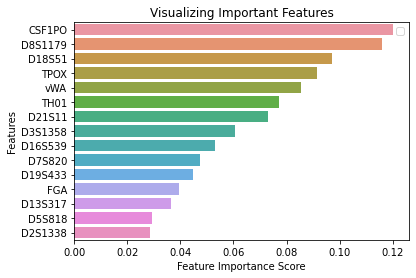

In [35]:
# can look at feature importance for this dataset given the model
# normalized total reduction of the criterion (entropy in this case) brought by this feature
feature_imp_tree = decision_tree.feature_importances_
indices = np.argsort(feature_imp_tree)[::-1]
sns.barplot(x=feature_imp_tree[indices], y=feature_names[indices])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import accuracy_score



train_score = accuracy_score(ytrain, decision_tree.predict(Xtrain))
test_score = accuracy_score(ytest, decision_tree.predict(Xtest))
print('training accuracy: {:2.2f}'.format(train_score), 'testing accuracy: {:2.2f}'.format(test_score))

training accuracy: 1.00 testing accuracy: 0.68


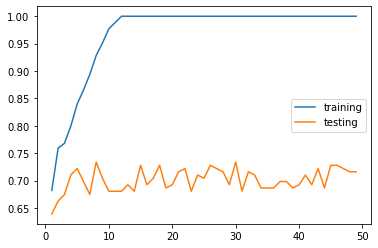

In [37]:
max_depth_values = np.arange(1,50)
train_score = np.zeros(max_depth_values.shape[0])
test_score = np.zeros(max_depth_values.shape[0])

for i, max_depth in enumerate(max_depth_values):
  decision_tree = DecisionTreeClassifier(criterion='entropy', 
                                       max_depth=max_depth)

  # fit the model to the training data
  decision_tree.fit(Xtrain, ytrain)
  train_score[i] = accuracy_score(ytrain, decision_tree.predict(Xtrain))
  test_score[i] = accuracy_score(ytest, decision_tree.predict(Xtest))

plt.plot(max_depth_values,train_score,label='training')
plt.plot(max_depth_values,test_score,label='testing')
plt.legend()

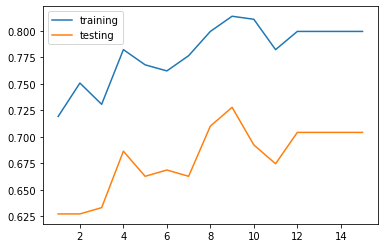

In [38]:
max_features_values = np.arange(1,16)
train_score = np.zeros(max_features_values.shape[0])
test_score = np.zeros(max_features_values.shape[0])

for i, max_features in enumerate(max_features_values):
  decision_tree = DecisionTreeClassifier(criterion='entropy', 
                                       max_depth=4, max_features=max_features)

  # fit the model to the training data
  decision_tree.fit(Xtrain, ytrain)
  train_score[i] = accuracy_score(ytrain, decision_tree.predict(Xtrain))
  test_score[i] = accuracy_score(ytest, decision_tree.predict(Xtest))

plt.plot(max_features_values,train_score,label='training')
plt.plot(max_features_values,test_score,label='testing')
plt.legend()

## Exercise 2

In [39]:
from sklearn.ensemble import RandomForestClassifier
# initiate a random forest object
rfc = RandomForestClassifier(criterion='entropy', 
                             n_estimators=100,
                             max_depth=None, 
                             bootstrap=True, 
                             n_jobs=None,
                            random_state=0)
rfc=RandomForestClassifier(n_estimators=100)
# fit the model
rfc.fit(Xtrain, ytrain)

RandomForestClassifier()

In [40]:
from sklearn.metrics import accuracy_score
train_score = accuracy_score(ytrain, rfc.predict(Xtrain))
test_score = accuracy_score(ytest, rfc.predict(Xtest))
print('training accuracy: {:2.2f}'.format(train_score), 'testing accuracy: {:2.2f}'.format(test_score))

training accuracy: 1.00 testing accuracy: 0.79


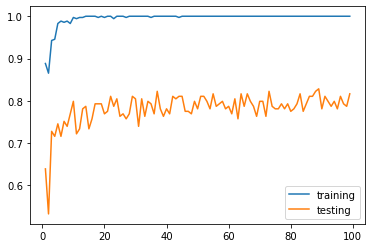

In [41]:
n_estimators_values = np.arange(1,100)
train_score = np.zeros(n_estimators_values.shape[0])
test_score = np.zeros(n_estimators_values.shape[0])

for i, n_estimators in enumerate(n_estimators_values):
  rfc = RandomForestClassifier(n_estimators=n_estimators)

  # fit the model to the training data
  rfc.fit(Xtrain, ytrain)
  train_score[i] = accuracy_score(ytrain, rfc.predict(Xtrain))
  test_score[i] = accuracy_score(ytest, rfc.predict(Xtest))

plt.plot(n_estimators_values,train_score,label='training')
plt.plot(n_estimators_values,test_score,label='testing')
plt.legend()

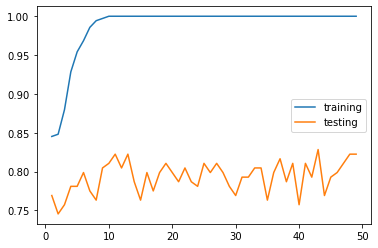

In [42]:
max_depth_values = np.arange(1,50)
train_score = np.zeros(max_depth_values.shape[0])
test_score = np.zeros(max_depth_values.shape[0])

for i, max_depth in enumerate(max_depth_values):
  rfc = RandomForestClassifier(n_estimators=100, max_depth = max_depth)

  # fit the model to the training data
  rfc.fit(Xtrain, ytrain)
  train_score[i] = accuracy_score(ytrain, rfc.predict(Xtrain))
  test_score[i] = accuracy_score(ytest, rfc.predict(Xtest))

plt.plot(max_depth_values,train_score,label='training')
plt.plot(max_depth_values,test_score,label='testing')
plt.legend()

In [ ]:
max_samples_values = np.arange(0.01,1,0.01)
train_score = np.zeros(max_samples_values.shape[0])
test_score = np.zeros(max_samples_values.shape[0])

for i, max_samples in enumerate(max_samples_values):
  rfc = RandomForestClassifier(n_estimators=100, max_samples = max_samples)

  # fit the model to the training data
  rfc.fit(Xtrain, ytrain)
  train_score[i] = accuracy_score(ytrain, rfc.predict(Xtrain))
  test_score[i] = accuracy_score(ytest, rfc.predict(Xtest))

plt.plot(max_samples_values,train_score,label='training')
plt.plot(max_samples_values,test_score,label='testing')
plt.legend()

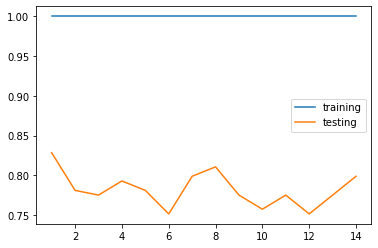

In [ ]:
max_features_values = np.arange(1,15)
train_score = np.zeros(max_features_values.shape[0])
test_score = np.zeros(max_features_values.shape[0])

for i, max_features in enumerate(max_features_values):
  rfc = RandomForestClassifier(n_estimators=100, max_features = max_features)

  # fit the model to the training data
  rfc.fit(Xtrain, ytrain)
  train_score[i] = accuracy_score(ytrain, rfc.predict(Xtrain))
  test_score[i] = accuracy_score(ytest, rfc.predict(Xtest))

plt.plot(max_features_values,train_score,label='training')
plt.plot(max_features_values,test_score,label='testing')
plt.legend()